__временные ряды и модели ARIMA__

Евгений Борисов esborisov@sevsu.ru

Дмитрий Макаров Временные ряды
https://www.dmitrymakarov.ru/intro/time-series-20/

In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt
import pandas as pd
#from tqdm.auto import tqdm
#tqdm.pandas()
np.set_printoptions(precision=2)

---

https://drive.google.com/file/d/1AbUl7tP_J47ST7L7kc3wxENxmpBUsumS/view

In [2]:
# читаем данные
url= 'https://drive.google.com/uc?id=1AbUl7tP_J47ST7L7kc3wxENxmpBUsumS'
df = pd.read_csv(url).convert_dtypes()
display(len(df))
display(df.info())
display(df.describe().T)

168

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Unnamed: 0                                168 non-null    Int64 
 1   Month                                     168 non-null    string
 2   Monthly milk production (pounds per cow)  168 non-null    Int64 
dtypes: Int64(2), string(1)
memory usage: 4.4 KB


None

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,168.0,83.5,48.641546,0.0,41.75,83.5,125.25,167.0
Monthly milk production (pounds per cow),168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


In [3]:
df['dt'] = pd.to_datetime(df['Month'])
df = df.set_index('dt')
df = df[['Monthly milk production (pounds per cow)']]

display(df.sample(3))

,Monthly milk production (pounds per cow)
dt,
1973-05-01,957
1967-12-01,698
1968-12-01,711


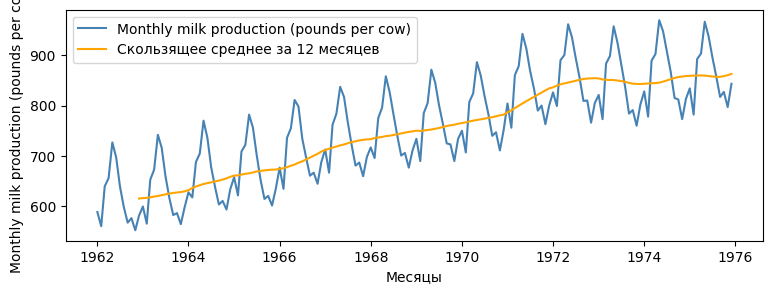

In [4]:
plt.figure(figsize = (9,3))
plt.plot(df, label = 'Monthly milk production (pounds per cow)', color = 'steelblue')
plt.plot(df.rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')
plt.legend(title = '', loc = 'upper left', )
plt.xlabel('Месяцы', )
plt.ylabel('Monthly milk production (pounds per cow)',)
plt.show()

#### Разложение временного ряда на компоненты

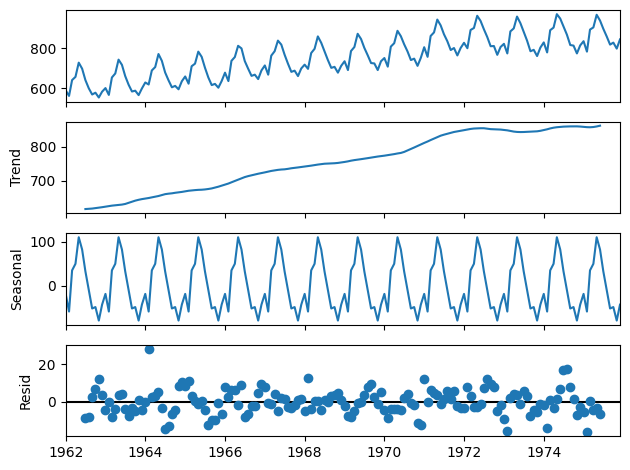

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df)
decompose.plot()
plt.show()

### Моделирование и построение прогноза

In [6]:
# разобьём данные на обучающую и тестовую выборки

# обучающая выборка будет включать данные до декабря 1959 года включительно
train = df[:'1971-12']

# тестовая выборка начнется с января 1960 года (по сути, один год)
test = df['1972-01':]

# автоматический подбор параметров модели ARIMA

In [7]:
# !pip install pmdarima

In [8]:
# импортируем функцию для автоматического подбора параметров модели ARIMA
from pmdarima import auto_arima

# настроим поиск параметров на обучающей выборке
parameter_search = auto_arima(
    train, 
    start_p=1, 
    start_q=1,
    max_p=3, 
    max_q=3, 
    m=12, 
    start_P=0,
    seasonal=True,
    d=None, 
    D=1, 
    trace=True, 
    error_action ='ignore', 
    suppress_warnings = True,  
    stepwise = True)           

# выведем результат
print(parameter_search.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=748.172, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=881.466, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=761.946, Time=0.22 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=798.012, Time=0.11 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1028.553, Time=0.01 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=770.997, Time=0.06 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=750.137, Time=0.47 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=755.615, Time=0.23 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=752.136, Time=0.94 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=752.620, Time=0.16 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=749.493, Time=0.31 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=748.187, Time=0.29 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=849.460, Time=0.09 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept  

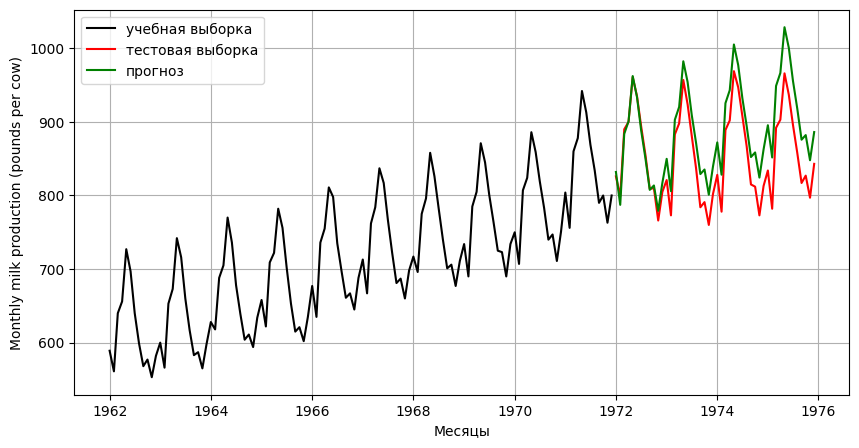

In [9]:
# тестовый прогнозный период начнется с конца обучающего периода
start = len(train)
# и закончится в конце тестового
end = len(train) + len(test) - 1

predictions = parameter_search.predict(start, end)

predictions_ = pd.DataFrame(predictions,index=test.index,columns=['predictions']) 

plt.figure(figsize=(10,5))
plt.plot(train, color = 'black',label='учебная выборка')
plt.plot(test, color = 'red',label='тестовая выборка')
plt.plot(predictions_, color = 'green',  label='прогноз')
plt.ylabel('Monthly milk production (pounds per cow)')
plt.xlabel('Месяцы')
plt.grid()
plt.legend()
plt.show()